## Distribuição Normal

Uma distribuição normal, também conhecida como distribuição gaussiana ou distribuição de sino, é um conceito fundamental na estatística e na teoria das probabilidades. Ela descreve a distribuição de dados contínuos que são simetricamente distribuídos em torno de sua média, formando uma curva em forma de sino quando plotados em um gráfico.

A distribuição normal é caracterizada por duas propriedades principais:

__Simetria__: A curva da distribuição normal é simétrica em relação à sua média. Isso significa que metade dos dados está à esquerda da média e metade está à direita, e a média, mediana e moda são todas iguais e estão localizadas no centro da distribuição.

__Forma de sino__: A curva da distribuição normal é mais alta no centro (na média) e diminui gradualmente em direção às caudas, formando a característica forma de sino. A maior densidade de dados está próxima à média, e à medida que você se move para longe da média em ambas as direções, a densidade de dados diminui.


#### Propriedades
- Simétrica ao redor da média $\mu$
- $f(x) = \dfrac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}, \forall x \in (-\infty, \infty)$

<br>

- $F(x) = P(X \leq x) = \int_{-\infty}^x f(x)dx = \Phi(x)$
- $E(X) = \mu$
- $Var(X) = \sigma^2$
- $Z = \dfrac{X - \mu}{\sigma} \sim N(0,1)$
- $P(X \leq \mu) = P(X\geq\mu) = 50\%$

 Momentos estatísticos da distribuição normal
 
 - __mean__: Média da distribuição. Em uma distribuição normal padrão a média é igual a 0.
 - __var__: Variância. Para a distribuição normal padrão, a variância é igual a 1, pois o desvio padrão é 1.
 - __skew__: Medida de assimetria da distribuição normal. Para a distribuição normal padrão, skew é igual a zero, o que indica que a distribuição é simétrica.
 - __kurt__: Curtose é a medida de achatamento da distribuição. Para a distribuição normal padrão, kurt é igual a três. 

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

mu = 0
std = 1
rv = norm(loc = mu, scale = std)
mean, var, skew, kurt = rv.stats(moments='mvsk')
mean, var, skew, kurt

(0.0, 1.0, 0.0, 0.0)

In [2]:
rv.ppf(0.001)

-3.090232306167813

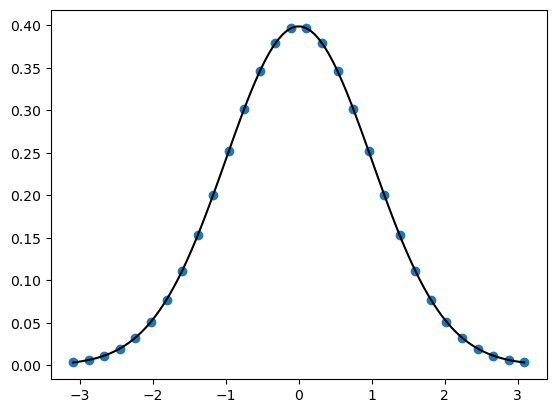

In [3]:
x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 30)
plt.plot(x, rv.pdf(x), 'o')
x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 100)
plt.plot(x, rv.pdf(x), 'k-')

Na distribuição normal, os dados são distribuídos de forma muito particular, tal que o **desvio padrão** determina a proporção de dados em cada faixa:

<img src="https://miro.medium.com/max/24000/1*IdGgdrY_n_9_YfkaCh-dag.png" width=500>

<img src="https://miro.medium.com/max/24000/1*IZ2II2HYKeoMrdLU5jW6Dw.png" width=500>

In [4]:
rv.cdf(3) - rv.cdf(-3)

0.9973002039367398

## Z-Score

O **z-score** de uma observação nada mais é que **o número de desvios padrões que a obervação está com relação à média**:

$$ z = \frac{x - \mu}{\sigma} $$

Como vimos acima, em uma distribuição normal, 99.73% das observações são esperadas de estar entre 3 desvios-padrão da média. Assim, obervações para além desta faixa são muito improváveis de ocorrer (0.27% de chance), de forma que podem ser consideradas outliers.

Assim, é comum considerar outliers os pontos tais que $|z| > 3$ (embora seja comum também variar este z-score limite, para 2.5 o, 3.5, etc.)

**OBS.: naturalmente, este método é altamente dependente da hipótese de que seus dados são normalmente distribuídos! Por isso, funciona apenas aproximadamente para outros casos. Mas é uma boa aproximação, em geral.**

**ex.:**
- z = 1.5 significa que estamos a um desvio padrão e meio distântes da média
- z = 2.25 significa que estamos a dois desvio padrão e um quarto distântes da média

**Ex.:** Dado que $X \sim N(10,100)$ (média=10, variância=100), calcule $P(10 < X < 20)$.

Dado que $X \sim N(10,100)$ então $ \dfrac{X-10}{10} = Z \sim N(0,1)$ e portanto

$$P(10 < X < 20) = P(\dfrac{10-10}{10} < \dfrac{X-10}{10} < \dfrac{20-10}{10}) =  P(0 < Z < 1)$$

$$P(0 < Z < 1) = P_{acc}(1) - P_{acc}(0)$$ 

valor acumulado para z=0:
$$P_{acc}(0) = 0.5 $$ 
valor acumulado para z=1:
$$P_{acc}(1) = 0.8413 $$

$$P(10 < X < 20) = P(0 < Z < 1) = P_{acc}(1) - P_{acc}(0) = 0.8413  - 0.5  = 0.3413$$

In [5]:
rv = norm(10, 10)

print(rv.cdf(0))
print(rv.cdf(1))
print(rv.cdf(1) - rv.cdf(0))

0.15865525393145707
0.18406012534675947
0.0254048714153024


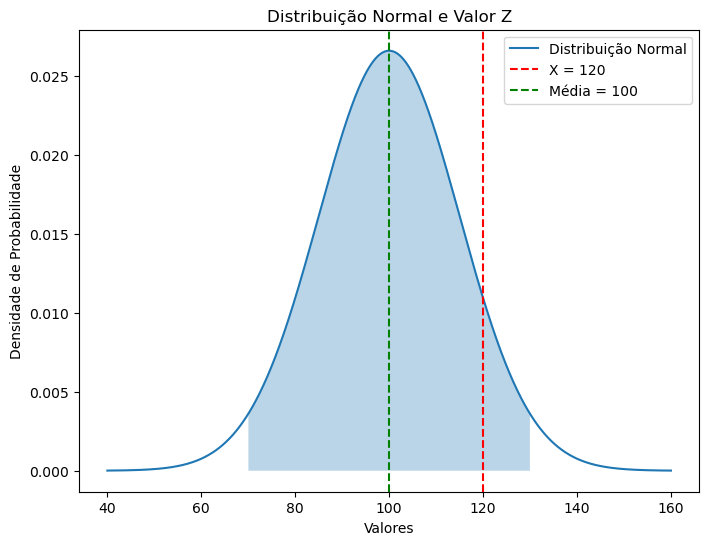

O valor Z para X = 120 na distribuição normal é 1.33


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

media = 100
desvio_padrao = 15

X = 120

valor_Z = (X - media) / desvio_padrao

x = np.linspace(media - 4 * desvio_padrao, media + 4 * desvio_padrao, 1000)

pdf = stats.norm.pdf(x, media, desvio_padrao)

plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label='Distribuição Normal')
plt.fill_between(x, pdf, 0, where=(x >= media - 2 * desvio_padrao) & (x <= media + 2 * desvio_padrao), alpha=0.3)
plt.axvline(x=X, color='r', linestyle='--', label=f'X = {X}')
plt.axvline(x=media, color='g', linestyle='--', label=f'Média = {media}')
plt.legend()
plt.title('Distribuição Normal e Valor Z')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidade')

plt.show()

print(f"O valor Z para X = {X} na distribuição normal é {valor_Z:.2f}")


## Teorema do Limite Central

### Apresentação visual 

In [7]:

np.random.seed(7)
N = 500_000
rand = np.random.normal(scale = 20, size = N)
ensaios = rand.reshape((500, 1000))
ensaios

array([[ 33.81051408,  -9.31874741,   0.65640327, ...,  -9.76913141,
        -12.57043404, -13.54878476],
       [ 17.69775907, -18.18236494,  22.70634844, ...,   7.08157202,
         -5.13841103,  -4.20957857],
       [ -1.51119477,  10.17886423, -15.93874147, ..., -19.73741272,
        -17.49297558,   3.30007677],
       ...,
       [-25.83476561, -20.37476154,  -2.13197292, ...,  -5.62626126,
         40.10069189,  -9.86649692],
       [-45.17100757, -15.01084434,  35.26663397, ...,   1.82566816,
         13.64738546,  37.282287  ],
       [  1.99601843,  -8.58853472,  15.47726234, ...,  -9.20148627,
        -13.43378452,   6.67915346]])

In [8]:
len(ensaios)

500

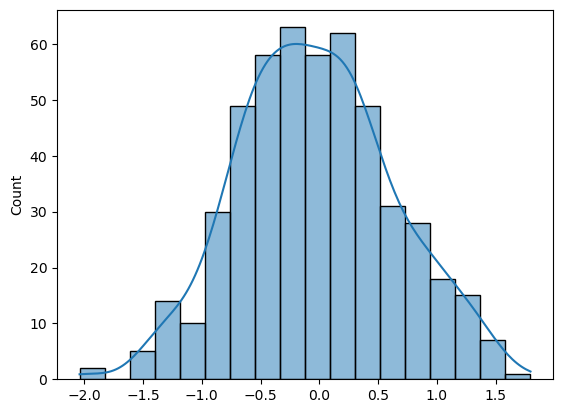

In [9]:
import seaborn as sns

sns.histplot(ensaios.mean(axis = 1), kde = True)
plt.show()

In [10]:
import math
from scipy.stats import norm

rv = norm()

#medidas populacionais
mean, var = rv.stats(moments = "mv")
mean, math.sqrt(var)

(0.0, 1.0)

In [11]:
#medidas amostras
ensaios.mean(axis = 1).mean()

-0.03041589904300029

In [12]:
ensaios.mean(axis = 1).std()

0.6589110440189798

In [13]:
#math.sqrt(var)/math.sqrt(1000)

In [14]:
#ensaios.mean(axis = 1).std()*math.sqrt(1000)

### Diferença entre poucas repetições com muitas observações e muitas repetições com poucos dados

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

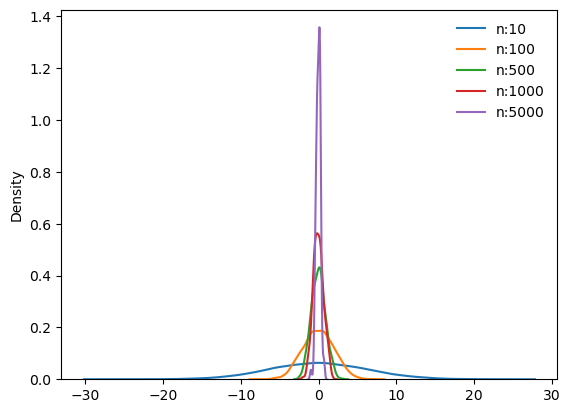

In [16]:
for n in [10, 100, 500, 1000, 5000]:
    sns.kdeplot(rand.reshape((int(N/n), n)).mean(axis = 1), label = "n:"+ str(n) )
plt.legend(loc = "best", frameon = False)

## Apresentação Teórica

Esse é um dos teoremas mais poderosos e fundamentais da estatística, porque ele é usado **como base para muitos outros resultados**. 

A ideia é que muitos dos resultados de inferência estatística são válidos assumindo como hipótese que os dados sob análise (**mais precisamente, os estimadores pontuais**) seguem uma distribuição normal. 

No entanto, há muitos casos de interesse em que a **distribuição populacional não é normal** -- e, na verdade, não temos como saber com segurança qual é a distribuição populacional, dado que temos apenas acesso às amostras!

Assim, a priori, muitos dos resultados e métodos da inferência estatística seriam invalidados, dado que não podemos assegurar qual é a distribuição populacional dos dados que estamos analisando.

E é neste contexto que o TLC mostra seu poder e importância, pois ele mostra que **estimadores pontuais de parâmetros populacionais serão normalmente distribuídos, INDEPENDENTE DA DISTRIBUIÇÃO POPULACIONAL!**

Vamos enunciá-lo, e depois veremos alguns exemplos:

> Seja uma **amostra aleatória** ($x_1, x_2, \cdots, x_n$) de uma variável aleatória $X$ com **qualquer distribuição**, média $\mu$ e desvio padrão $\sigma$. Para $n$ suficientemente grande, a **distribuição das médias amostrais**, $\overline{X}$, se **aproxima de uma distribuição normal** com média $\mu_{\overline{x}} = \mu$ e erro padrão $SE_{\overline{X}} = \frac{\sigma}{\sqrt{n}}$. Isto é, $$\overline{X} \sim N \left(\mu, \frac{\sigma}{\sqrt{n}} \right)$$
OBS.: quando estamos falando do **estimador amostral do desvio padrão**, costumamos usar o termo **erro padrão** (standard error), denotado $SE$.

O que o TLC para as médias diz, essencialmente, é:

> A distribuição de **médias das amostras** tiradas de **qualquer distribuição populacional** será **aproximadamente normal**, contanto que fizermos uma quantidade razoável de amostras com tamanho amostral.

E isso é um resultado fantástico, pois nos permite a construção de uma **distribuição normal**, para a qual vale uma série de resultados e teoremas, a partir de **qualquer distribuição populacional**!

### Atividade

__Questão 1__: Notas em um Exame

Suponha que as notas de um exame de matemática em uma turma de 50 alunos seguem uma distribuição normal com uma média de 75 pontos e um desvio padrão de 10 pontos. Qual é a probabilidade de um aluno tirar uma nota superior a 85 pontos neste exame?

In [11]:
from scipy.stats import norm

media = 75
desvio_padrao = 10

X = 85
valor_Z = (X - media) / desvio_padrao

probabilidade = 1 - norm.cdf(valor_Z)
probabilidade

0.15865525393145707

In [10]:
from scipy.stats import norm


media = 75
desvio_padrao = 10
dist = norm(media, desvio_padrao)

X = 85

valor_Z = (X - media) / desvio_padrao


probabilidade = 1 - dist.cdf(85)
probabilidade

0.15865525393145707

__Questão 2__: Tempo de Entrega de Produtos

Uma empresa de entregas afirma que o tempo médio de entrega de seus produtos é de 3 dias úteis, com um desvio padrão de 0,5 dia útil. Seus clientes estão insatisfeitos e alegam que a empresa está demorando mais do que o prometido. Qual é a probabilidade de um produto ser entregue em menos de 2 dias úteis?

In [9]:
from scipy.stats import norm

media = 3
desvio_padrao = 0.5
dist = norm(media, desvio_padrao)

X = 2

valor_Z = (X - media) / desvio_padrao

probabilidade = 1-dist.cdf(X)
probabilidade

0.9772498680518208

__Questão 3__: Alturas de Adultos

As alturas dos adultos em uma determinada população seguem uma distribuição normal com média de 170 cm e desvio padrão de 10 cm. Se uma pessoa for escolhida aleatoriamente dessa população, qual é a probabilidade de que sua altura esteja entre 160 cm e 180 cm?

In [8]:
from scipy.stats import norm

media = 170
desvio_padrao = 10

X1 = 160
X2 = 180

valor_Z1 = (X1 - media) / desvio_padrao
valor_Z2 = (X2 - media) / desvio_padrao

probabilidade = norm.cdf(valor_Z2) - norm.cdf(valor_Z1)
probabilidade


0.6826894921370859

In [2]:
from scipy.stats import norm

media = 170
desvio_padrao = 10
dist = norm(media, desvio_padrao)

X1 = 160
X2 = 180

valor_Z1 = (X1 - media) / desvio_padrao
valor_Z2 = (X2 - media) / desvio_padrao

probabilidade = dist.cdf(X2) - dist.cdf(X1)
probabilidade


0.6826894921370859

__Questão 4__: Tempo de Espera em uma Fila

Em um supermercado, o tempo médio de espera em uma fila é de 5 minutos, com um desvio padrão de 2 minutos. Qual é a probabilidade de um cliente ter que esperar mais de 7 minutos na fila?

In [3]:
from scipy.stats import norm

media = 5
desvio_padrao = 2

X = 7

valor_Z = (X - media) / desvio_padrao

probabilidade = 1 - norm.cdf(valor_Z)
probabilidade


0.15865525393145707

__Questão 5__: Pontuações em um Teste Padronizado

As pontuações em um teste padronizado seguem uma distribuição normal com média de 500 e desvio padrão de 100. Qual é a probabilidade de um aluno obter uma pontuação entre 450 e 600?

In [4]:
from scipy.stats import norm

media = 500
desvio_padrao = 100

X1 = 450
X2 = 600

valor_Z1 = (X1 - media) / desvio_padrao
valor_Z2 = (X2 - media) / desvio_padrao

probabilidade = norm.cdf(valor_Z2) - norm.cdf(valor_Z1)

probabilidade

0.532807207342556

__Questão 6__: Produção de Peças Defeituosas

Em uma fábrica, a produção de peças segue uma distribuição normal com uma média de 200 peças por dia e um desvio padrão de 20 peças por dia. Qual é a probabilidade de que a produção diária seja superior a 220 peças?

In [5]:
from scipy.stats import norm

media = 200  
desvio_padrao = 20

X = 220 

valor_Z = (X - media) / desvio_padrao

probabilidade = 1 - norm.cdf(valor_Z)
probabilidade

0.15865525393145707

__Questão 7__: Altura de Jogadores de Basquete

As alturas dos jogadores de uma equipe de basquete adulto seguem uma distribuição normal com média de 195 cm e desvio padrão de 10 cm. Qual é a probabilidade de que um jogador escolhido aleatoriamente tenha menos de 185 cm de altura?

In [6]:
from scipy.stats import norm

media = 195 
desvio_padrao = 10

X = 185

valor_Z = (X - media) / desvio_padrao

probabilidade = norm.cdf(valor_Z)

probabilidade


0.15865525393145707

__Questão 8__: Vendas Diárias de um Produto

As vendas diárias de um produto em uma loja seguem uma distribuição normal com média de 100 unidades por dia e desvio padrão de 15 unidades por dia. Qual é a probabilidade de que a loja venda menos de 90 unidades em um dia?

In [7]:
from scipy.stats import norm


media = 100  
desvio_padrao = 15

X = 90

valor_Z = (X - media) / desvio_padrao

probabilidade = norm.cdf(valor_Z)
probabilidade

0.2524925375469229

### E se não for normal? Testes de Hipótese

Embora diversas variáveis na natureza apresentem um comportamento que se aproxima de uma distribuição normal, nem sempre temos dados suficientes para que a amostra apresente este comportamento. Em alguns casos, embora apresente visualmente uma distribuição que se assemelha a um "`sino`", a variável pode não se encaixar nas propriedade de uma distribuição normal. 

Nesses casos, como proceder?

### 1. Teste de hipótese

O primeiro passo é certificar-se se a distribuição da variável é ou não normal. Para isso realizamos testes de hipótese como o teste __`Shapiro-Wilk`__.

Um teste de hipótese é um procedimento estatístico usado para tomar decisões sobre uma afirmação ou hipótese a respeito de uma população com base em informações de uma amostra dos dados. 

In [12]:
import numpy as np
from scipy import stats

dados = np.random.normal(0, 1, 100)

stat, p_valor = stats.shapiro(dados)

alpha = 0.05

print(f"Estatística de teste: {stat:.4f}")
print(f"P-valor: {p_valor:.4f}")

if p_valor > alpha:
    print("Resultado: Não rejeitamos a hipótese nula (os dados seguem uma distribuição normal)")
else:
    print("Resultado: Rejeitamos a hipótese nula (os dados não seguem uma distribuição normal)")


Estatística de teste: 0.9925
P-valor: 0.8571
Resultado: Não rejeitamos a hipótese nula (os dados seguem uma distribuição normal)


( __Observação__ )  ⚠️ : Lembre-se de que o teste de Shapiro-Wilk é sensível a amostras de tamanho pequeno, portanto, para amostras grandes, ele pode detectar desvios mínimos da normalidade. É importante interpretar os resultados com cautela e considerar o contexto da análise.

### 2. Transformação nos dados

Text(0.5, 1.0, 'Dados Não Normais')

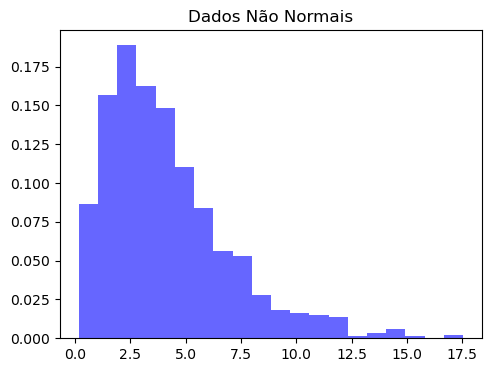

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

dados_nao_normais = np.random.gamma(2, scale=2, size=1000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(dados_nao_normais, bins=20, density=True, alpha=0.6, color='b')
plt.title('Dados Não Normais')

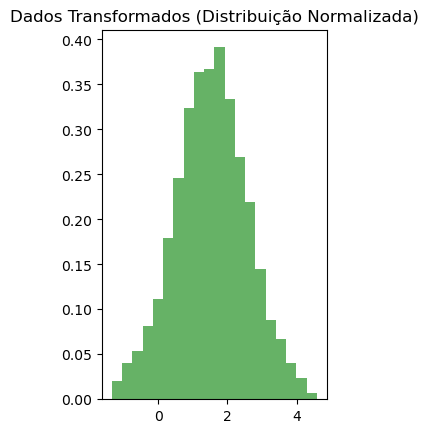

Parâmetro Lambda da Transformação de Box-Cox: 0.3068


In [3]:
dados_transformados, lambda_param = stats.boxcox(dados_nao_normais)

plt.subplot(1, 2, 2)
plt.hist(dados_transformados, bins=20, density=True, alpha=0.6, color='g')
plt.title('Dados Transformados (Distribuição Normalizada)')

plt.show()

print(f"Parâmetro Lambda da Transformação de Box-Cox: {lambda_param:.4f}")

### 3. Testes não paramétricos

Testes paramétricos e testes não paramétricos são duas categorias de testes estatísticos usados para fazer inferências sobre populações com base em dados amostrais. A principal diferença entre eles está na suposição sobre a distribuição subjacente dos dados.

__Testes Paramétricos__:

Testes paramétricos fazem suposições específicas sobre os parâmetros (características) da distribuição subjacente dos dados, como a média e o desvio padrão. As suposições comuns incluem:

1. Os dados seguem uma distribuição normal (ou aproximadamente normal).
2. Os dados têm homogeneidade de variância, ou seja, o desvio padrão é constante em todas as amostras.
3. Os dados são intervalares ou de razão, ou seja, têm uma escala numérica significativa.

Exemplos de testes paramétricos incluem o teste t de Student, a análise de variância (ANOVA), o teste de regressão linear e muitos outros. Esses testes são poderosos quando as suposições são atendidas, mas podem não ser apropriados quando as suposições não são cumpridas.

__Testes Não Paramétricos__:

Testes não paramétricos, por outro lado, são projetados para serem usados quando as suposições sobre a distribuição dos dados não são atendidas ou quando os dados não atendem aos critérios dos testes paramétricos. Eles não fazem suposições sobre a forma da distribuição subjacente e são baseados em ordem e classificação dos dados.

Alguns exemplos de testes não paramétricos incluem o teste de Mann-Whitney U (uma alternativa não paramétrica ao teste t de Student), o teste de Wilcoxon (um teste não paramétrico para amostras pareadas), o teste de Kruskal-Wallis (uma alternativa não paramétrica à ANOVA) e o teste qui-quadrado (um teste não paramétrico para associação entre variáveis categóricas).

Os testes não paramétricos são mais robustos em relação às suposições de distribuição, mas podem ter menos poder estatístico do que os testes paramétricos quando as suposições paramétricas são atendidas. A escolha entre testes paramétricos e não paramétricos depende das características dos dados e das suposições que podem ser razoavelmente feitas. Em geral, se os dados atendem às suposições paramétricas, os testes paramétricos são preferíveis devido à sua maior sensibilidade. Caso contrário, os testes não paramétricos podem ser uma escolha mais apropriada.




